In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import roc_curve, auc

In [33]:
df = sb.load_dataset("iris")

mms = MinMaxScaler() 
fake_val = mms.fit_transform(df["sepal_length"].values.reshape(-1,1))
y_pred = [1 if it>=0.5 else 0 for it in fake_val[:,0]]
y_actual = [1 if it>0.45 else 0 for it in fake_val[:,0]]

""" 
    Accuracy = TP / ( test_sample_size )

    Precision = TP / ( TP + FP ) 

    Recall = TP / ( TP + FN )

    F1_score = 2 * ( ( Precision * Recall ) / ( Precision + Recall ) )

"""


accuracy = accuracy_score(y_actual,y_pred)
precision = precision_score(y_actual, y_pred) 
recall = recall_score(y_actual,y_pred) 
f1 = f1_score(y_actual, y_pred) 
print(accuracy) 
print(precision) 
print(recall) 
print(f1) 

0.92
1.0
0.8208955223880597
0.9016393442622951


In [32]:
# multi class case 
y_pred = [2 if it>=0.7 else 1 if it>=0.5 else 0 for it in fake_val[:,0]]
y_actual = [2 if it>=0.8 else 1 if it>=0.5 else 0 for it in fake_val[:,0]]

accuracy = accuracy_score(y_actual,y_pred)
print(accuracy)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0]
0.96


1.0


Text(0.5, 1.0, 'ROC AUC')

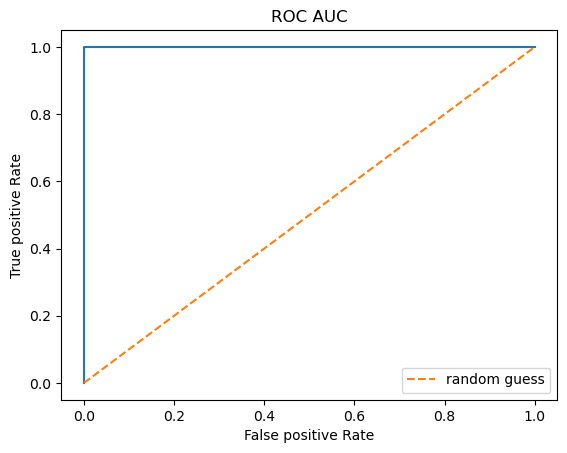

In [57]:
y_actual = [1 if it>0.45 else 0 for it in fake_val[:,0]]
y_pred = [it for it in fake_val[:,0]]

fpr, tpr, thresholds = roc_curve(y_actual,y_pred)

roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.plot(fpr,tpr)
sb.lineplot(x=[0,1], y=[0,1], linestyle="--", label="random guess" )
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC AUC")
